# Import the core packages
> Other dependencies will be imported based on need in the following code cells

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import tensorflow as tf

# Data Preparation

import our dataset -- primary FAANG stock data which include AAPL, NETFLIX, GOOGL, MSFT, AMZN.
 This dataset has been pre-processed to remove **NaN** values.
 
 It could still have problems that could bias the outcome like errors in input, duplication, etc.

In [10]:
# import all the unclean data for aal five stocks into separate variables 
uDataAmazon = pd.read_csv('./data/Amazon.csv')
uDataApple = pd.read_csv('./data/Apple.csv')
uDataGoogle = pd.read_csv('./data/Google.csv')
uDataNetflix = pd.read_csv('./data/Netflix.csv')
uDataMicrosoft = pd.read_csv('./data/Microsoft.csv')

# combine all the temp data values into a list to perform mapping operations
uDataList = [ uDataAmazon, uDataApple, uDataGoogle, uDataMicrosoft, uDataNetflix ]

In [11]:
# view what the data looks like
uDataAmazon.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03
1,4.268750,4.575000,4.087500,4.096875,4.096875,349748000,2000-01-04
2,3.525000,3.756250,3.400000,3.487500,3.487500,769148000,2000-01-05
3,3.565625,3.634375,3.200000,3.278125,3.278125,375040000,2000-01-06
4,3.350000,3.525000,3.309375,3.478125,3.478125,210108000,2000-01-07


In [12]:
# view a discription of the data 
uDataGoogle.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4.677000e+03
mean,38.255309,38.656113,37.861995,38.265822,38.265822,1.226090e+08
std,35.540477,35.943265,35.161971,35.555944,35.555944,1.529406e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.657307,12.771629,12.487195,12.640869,12.640869,2.968400e+07
50%,25.577278,25.772150,25.253166,25.534290,25.534290,6.698614e+07
75%,54.528500,55.233501,53.894001,54.546501,54.546501,1.527946e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [13]:
# Check for NaN values in each column of each unclean dataset
nan_counts = [ list(data.isna().sum()) for data in uDataList ]
nan_counts

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [14]:
# duplicate data count detection in data 
duplicates_per_df = [ df.duplicated().sum() for df in uDataList ]
duplicates_per_df

[0, 0, 0, 0, 0]

# Visual of the complete data of all five datasets
This is done before splitting the data into training and testing sets to see and analyze correlation between stocks of the same category.
Correlation detection of closing prices and volume has to be correlated so that the model can work on the category instead of singe units.



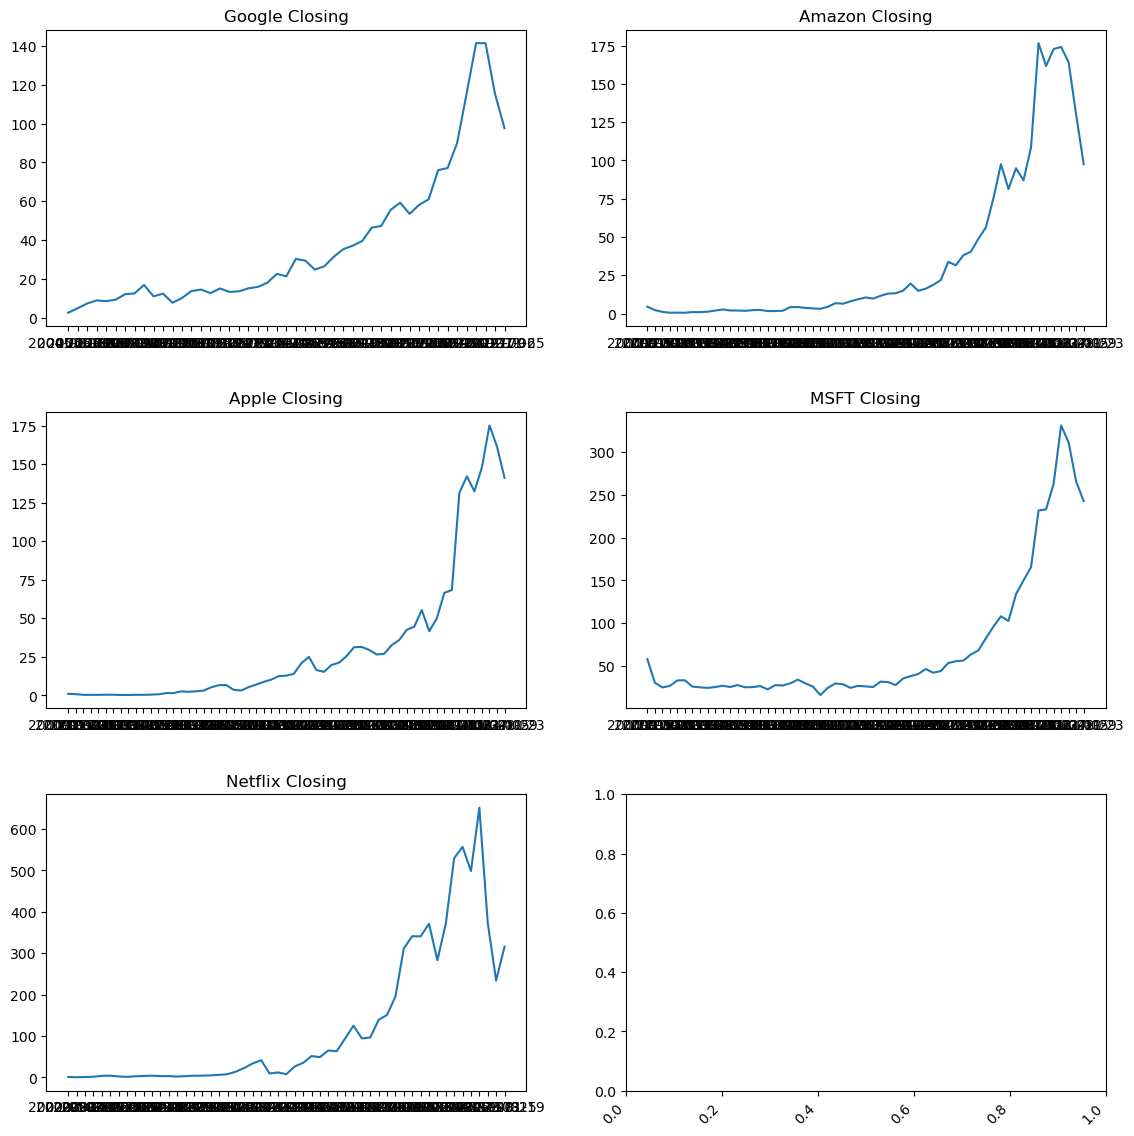

In [15]:
# Initialize the subplot function using the number of rows and columns
figure, axis = plt.subplots(3, 2, figsize=(12, 12))

# For Google's closing function (using a step of 100 to render it better)
axis[0, 0].plot(uDataGoogle['Date'][0:len(uDataGoogle):100], uDataGoogle['Close'][0:len(uDataGoogle):100])
axis[0, 0].set_title("Google Closing")

# For Amazon's closing function (using a step of 100 to render it better)
axis[0, 1].plot(uDataAmazon['Date'][0:len(uDataAmazon):100], uDataAmazon['Close'][0:len(uDataAmazon):100])
axis[0, 1].set_title("Amazon Closing")

# For Apple's closing function (using a step of 100 to render it better)
axis[1, 0].plot(uDataApple['Date'][0:len(uDataApple):100], uDataApple['Close'][0:len(uDataApple):100])
axis[1, 0].set_title("Apple Closing")

# For Microsoft's closing function (using a step of 100 to render it better)
axis[1, 1].plot(uDataMicrosoft['Date'][0:len(uDataMicrosoft):100], uDataMicrosoft['Close'][0:len(uDataMicrosoft):100])
axis[1, 1].set_title("MSFT Closing")

# For Netflix's closing function (using a step of 100 to render it better)
axis[2, 0].plot(uDataNetflix['Date'][0:len(uDataNetflix):100], uDataNetflix['Close'][0:len(uDataNetflix):100])
axis[2, 0].set_title("Netflix Closing")

# Adjust layout and rotation of x-axis labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)

# Combine all the operations and display
plt.show()


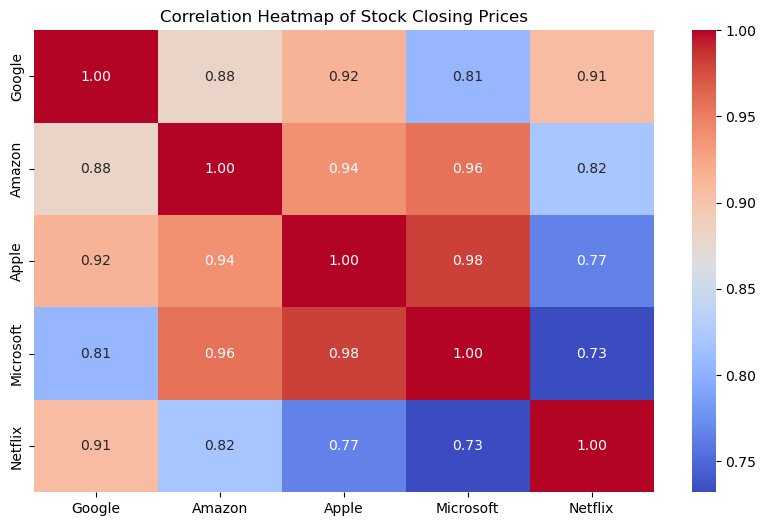

In [16]:
# Combine the data from all companies into a single DataFrame
combined_data = pd.concat([uDataGoogle['Close'], uDataAmazon['Close'], uDataApple['Close'], 
                           uDataMicrosoft['Close'], uDataNetflix['Close']], axis=1)
combined_data.columns = ['Google', 'Amazon', 'Apple', 'Microsoft', 'Netflix']

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Closing Prices')
plt.show()

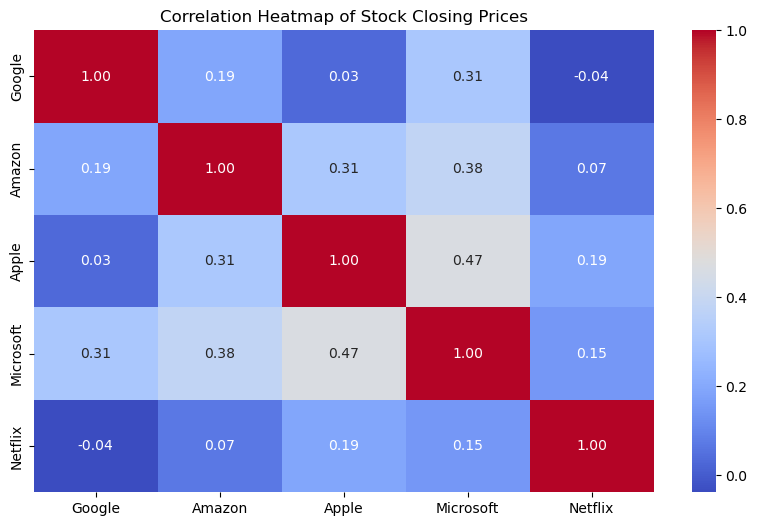

In [17]:
# Combine the data from all companies into a single DataFrame
combined_data = pd.concat([uDataGoogle['Volume'], uDataAmazon['Volume'], uDataApple['Volume'], 
                           uDataMicrosoft['Volume'], uDataNetflix['Volume']], axis=1)
combined_data.columns = ['Google', 'Amazon', 'Apple', 'Microsoft', 'Netflix']

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Closing Prices')
plt.show()